In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression


In [2]:
df = pd.read_csv('ushape.csv')

In [3]:
df.head()

,3.159499363321345566e-02,9.869877579082642072e-01,0.000000000000000000e+00
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


In [4]:
x = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

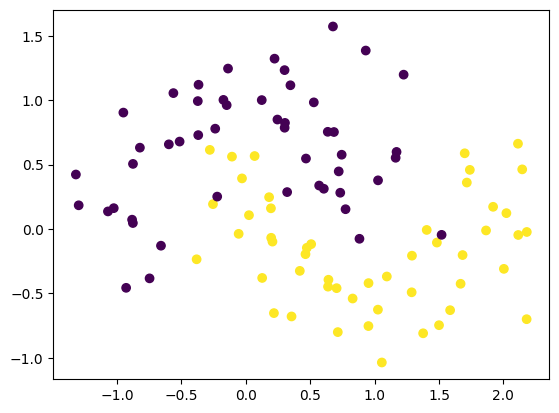

In [5]:
plt.scatter(x[:,0],x[:,1],c=y)

In [6]:
clf = LogisticRegression()
clf.fit(x,y)

LogisticRegression()

<Axes: >

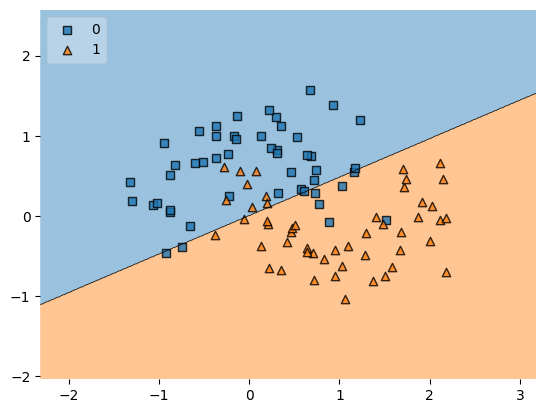

In [7]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(x,y.astype('int'),clf,legend = 2
                     )

In [8]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(clf,x,y,scoring = 'accuracy',cv = 10))

np.float64(0.8300000000000001)

In [9]:
poly = PolynomialFeatures(degree = 3,include_bias = False)
x_trf = poly.fit_transform(x,y)

In [10]:
clf1 = LogisticRegression()
np.mean(cross_val_score(clf1,x_trf,y,scoring = 'accuracy',cv =10))

np.float64(0.9099999999999999)

In [11]:
def plot_decision_boundry(x,y,degree = 1):
    poly = PolynomialFeatures(degree = degree)
    x_trf = poly.fit_transform(x)

    clf = LogisticRegression()
    clf.fit(x_trf,y)
    accuracy = np.mean(cross_val_score(clf,x_trf,y,scoring = 'accuracy',cv =10))

    a = np.arange(start = x[:,0].min()-1, stop = x[:,0].max()+1 ,step = 0.01)
    b = np.arange(start = x[:,1].min()-1, stop = x[:,1].max()+1 ,step = 0.01)

    xx,yy = np.meshgrid(a,b)

    input_array = np.array([xx.ravel(),yy.ravel()]).T
    labels = clf.predict(poly.transform(input_array))

    plt.contourf(xx,yy,labels.reshape(xx.shape),alpha = 0.5)
    plt.scatter(x[:,0],x[:,1],c = y)
    plt.title('degree = {},accuracy is {}'.format(degree,np.round(accuracy,4)))


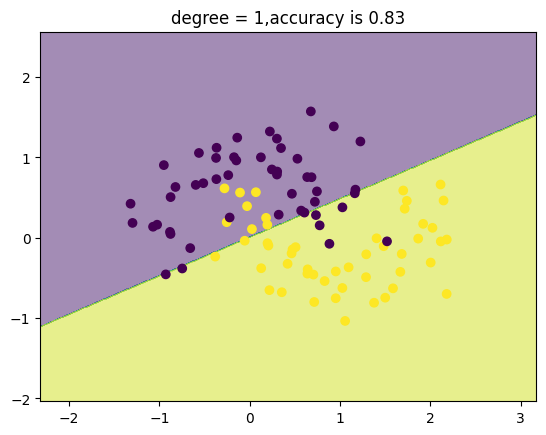

In [12]:
plot_decision_boundry(x,y)

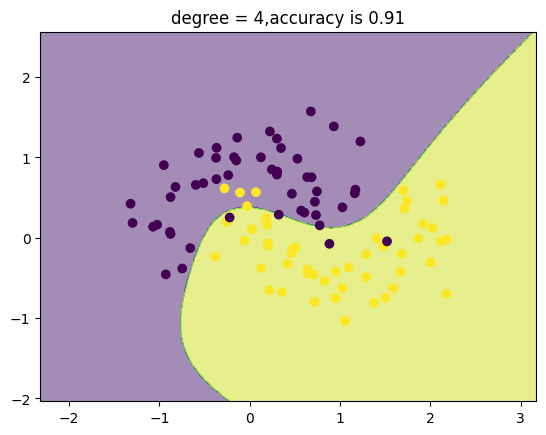

In [13]:
plot_decision_boundry(x,y,4)